## Clean and Analyze Employee Exit Surveys 
Methodology:  <br> Our aim is to look into the reasons why employees from two Australian governmental agencies are resigning. The main question we will be focusing on is: <br>1) Is the number of years spent working correlated with dissatisfaction in the workplace? <br> To complete our analysis, we will working with job exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. These two data sets were directly sourced from www.data.gov.au. The high-level nature of survey responses will be effective in allowing us to identify patterns and make appropriate generalizations.

We will first read in our data sets and assign them to corresponding dataframes

In [150]:
import pandas as pd 
import numpy as np

In [151]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

Once we have read in the data, we want to start looking for possible ways to clean our dataframes. One of these is wrangling NaN values

In [152]:
#print each column with corresponding number of valid (non-null) entries
print(dete_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

> DETE data has a few columns which are mainly comprised of NaN values. These are: 'Aboriginal', 'Torres Strait', 'South Sea', 'Disability', and 'NESB'

In [153]:
#print each column with corresponding number of non-NA values 
print(tafe_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

 > We can see TAFE has a more granular approach towards the topics being surveyed. This explains why TAFE has several more columns than DETE. <br>
Additionally, it appears most of TAFE columns contain the acceptable threshold (25-30%) of NaN values.

Now, we want to see if there is anything that stands out from the first few rows of each dataframe

In [154]:
#print the first 5 rows of DETE datframe
print(dete_survey.head())

   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Cent

> Some observations: <br>
-  There is a 'Role Start Date' which is different from 'Start Date', we will have to decide which one to use to calculate leght of employment 
- Cease date has month and year specified 
- There are some rows with 'Not Stated' values

In [155]:
#print forst 5 columns of TAFE dataframe
print(tafe_survey.head())

      Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                   

> Notice the contributing factors columns have dash values mixed in with the NaN's. For both dataframes, it is important to represent missing values as NaN's so we may use helpful functions such as dropna().

In [156]:
#read in DETE again, but this time using the na_values parameter to specify how to represent missing values 
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')    

> We have now transformed DETE to only have NaN values. We will deal with the dash values in TAFE later on in the project since we will have to combine both dissatisfaction columns to optimize our analysis.

Now that we have dealt identifying and representing NaN values correctly, we can begin to look at which of our columns are extraneous to our analysis. Our motivation for doing this is that by dropping columns with redudant or irrelevant information, we can streamline our processing of the data. The first question we are trying to answer is: <br> 1) Are employees who only worked for the agency for a short period of time resigning due to some kind of dissatisfaction?
<br> Hence, we will focus our attention on the portion of the survey which contains information about dissatisfaction, length of employment, and any relevant information about the employees. 

In [157]:
#drop columns 28 through 48 which contain extraneous personal information and the NaN majority columns 
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [158]:
#drop columns 17 through 66 which contain irrelevant questions
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

Before moving on, we will quickly clean up the names of our columns in both dataframes so they are easier to identify 

In [159]:
#replace spaces with underscores, strip whitespace, and convert to lowercase 
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.strip().str.lower()

In [160]:
#individually rename columns 
tafe_survey_updated = tafe_survey_updated.rename(columns = {'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype','Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service','LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

> For 'tafe_survey_updated', we have individually renamed the columns since several names were actually questions.

Moving on, we will look at the 'separationtype' column. This columns will help us identify the employees who resigned 

In [161]:
#get count of each value in 'separationtype' column
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [162]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

> Interestingly, DETE has three categories for resignation while TAFE only has one. We want to combine the DETE resignations into one column to make our analysis easier

In [163]:
#strip the column name at the dash, allowing us to locate 'resignation' only
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
print(dete_survey_updated['separationtype'].value_counts())
#make new dataframe which only contains employees who have resigned
dete_resignation = dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64


In [164]:
#make new dataframe which only contains employees who have resigned
tafe_resignation = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()

>DETE resignation categories have been condensed into a single category. 
We have also made separate dataframes, dete_resignation and tafe_resignation, which represent information only for employees who have resigned. 

Next, we will check the years in each dataframe for logical inconsistencies. Since we want to investigate start and end dates in our analysis, we want to make sure they are extracted from dates with the months included. 

In [165]:
#count of entries corresponding to each year in DETE 
dete_resignation['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
07/2006      1
2010         1
09/2010      1
Name: cease_date, dtype: int64

> We can see that the DETE cease_date column has values which vary from specifing month and year to just specifing the year. For our analysis, we will just take the year into account. 

In [166]:
#split date string at '/' and extract the year by index
dete_resignation['cease_date'] = dete_resignation['cease_date'].str.split('/').str[-1]
#convert year to float type
dete_resignation['cease_date'] = dete_resignation['cease_date'].astype("float")

In [167]:
#check to see if our values are now being sorted by year only
dete_resignation['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

> After cleaning up the cease_date column, we can now try to discern patterns for resignation times of employees. Notice resignation numbers increased greatly after 2010, only to decrease by 85% from 2013 to 2014. 

We can now look at the TAFE dataframe cease_date column to see if it also needs to be cleaned

In [168]:
#print value of resignations corresponding to years
tafe_resignation['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

> Luckily, the TAFE cease_date column is already in the year-only format we want. Also notice, resignation numbers increased each year, until 2012 when they started to decrease.

We can also look at the start date column in DETE to see if there are any obvious patterns. 

In [169]:
#look at number of hires for each year, use sort_index() to order by year
dete_resignation['dete_start_date'].value_counts(ascending=True).sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

> From DETE start_date, we can see that there has been a surge in hiring after 2004. Although, we can see 2013 had the least hires from the 9 previous years. This was also the year with the most resignantions.

From looking at the cease and start dates above, it seems as though employees started leaving in bigger numbers after 2011. Let's create a new column in our resignation-specific dataframes to quantify the number of years an employee has workes. This may help see if it is new or lasting employees who resigned and why it is they resigned.

In [170]:
dete_resignation['institute_service'] = dete_resignation['dete_start_date'] - dete_resignation['cease_date']

> In TAFE, we have an institute_service column which cotains the lenght of employment. We now have an analogous column in DETE.

### Categorizing Employee Dissatisfaction: <br> 
In this next section we will use the columns we have created in addition to the ones we already had in resignation dataframes to investigate dates related to dissatisfied employees.
<br> It is now time to deal with the problematic dash (-) entries in the contributing factors columns from TAFE.

In [171]:
tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [172]:
tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

> The two dissatisfaction columns have 270 and 277 values which are not stated(-), respectively. To resolve this, we will make a function which takes in a value and if it a dash, returns True. Else, if it is NaN, it will return np.nan. <br> We want combine the two dissatisfaction columns in a way that preserves information, this is why we are making a function to deal with the dashes instead of using replace( ).

In [173]:
#function reads in val and classifies entries using bool values
def update_val(val):
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True

In [174]:
#use applymap( ) to utilize the function we made above
#make new combined column in TAFE named 'dissatisfied'
tafe_resignation['dissatisfied'] = tafe_resignation[['Contributing Factors. Dissatisfaction', 
                                                     'Contributing Factors. Job Dissatisfaction',]].applymap(update_val).any(axis=1, skipna=False)
#make copy of DF with new column
tafe_resignation_up = tafe_resignation.copy()

> Above, we have used any( ) to create a new column which uses logic to combine TRUE, FALSE, and NaN values. This preserves the information from both columns when there are non-NaN values.

Now, we want proceed in a similar way DETE, where we condense all the different dissatisfaction categories into one. 

In [175]:
#Again, using any( ) to combine bool values 
dete_resignation['dissatisfied'] = dete_resignation[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(axis=1, skipna=False)

dete_resignation_up = dete_resignation.copy()

dete_resignation_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

> Since the relevant values in the DETE dataframe were already bool type, we have combined the columns which correspond to reasons for dissatisfaction into one column easily. There is a roughly equal amount of satisfied and dissatisfied employees. 

### Combining DataFrames:
<br> Throughout this project we have worked with two separate dataframes that contain very similar information. By combining the resignantion dataframes into one, we can gain insights more easily. 

In [176]:
dete_resignation_up['institute'] = 'DETE'
tafe_resignation_up['institute'] = 'TAFE'

> We have added columns to distinguish between DATE and TAFE once we combine the dataframes.

In [177]:
#use concat( ) to put the two df together, get all cols from each 
combined = pd.concat([dete_resignation_up, tafe_resignation_up], ignore_index=True)
#print non_null values corresponding to each col
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

In an attempt to further simplify our combined dataframe, we will be dropping columns with less than 500 (> 60%) non_null values. We  can do this since we have created columns such as 'insitute_service_up' and 'dissatisfied' in both dataframes which effectively condense the information we need to move forward. 

In [178]:
#use dropna( ) to remove columns(axis=1) which contain NaN values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

Lastly, we want to clean up the institute_service column which was already in the df when we started our analysis. It contains several different categories we will condense

In [179]:
combined_updated['institute_service']

0                    -7
1                   -18
2                    -3
3                   -15
4                    -3
5                   -14
6                    -5
7                   NaN
8                   -30
9                   -32
10                  -15
11                  -39
12                  -17
13                   -7
14                   -9
15                   -6
16                   -1
17                  NaN
18                  -35
19                  -38
20                   -1
21                  -36
22                   -3
23                   -3
24                  -19
25                   -4
26                   -9
27                   -1
28                   -6
29                   -1
             ...       
621                 1-2
622                 3-4
623                 5-6
624                 NaN
625                 NaN
626                 3-4
627                 NaN
628    Less than 1 year
629    Less than 1 year
630                 1-2
631    Less than

In [180]:
#use regex expression to extract the years only
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
#turn into float type
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

combined_updated['institute_service_up'].value_counts().sort_index()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
Name: institute_service_up, dtype: int64

> From the information above, we can see that most employees worked for 0-10 years. Surprisingly, employees work for one year only most often. 

Now that we have an optimized combined dataframes with uniform datatypes, we can continue our analysis. 
<br> First, we will make a function which classifies each resigning  employee by the numbers of year they worked. The gaol with this is to hopefully see a correlation between years of service and resignation. 

In [181]:
#make classification function based on years working
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
#make new column and utilize function on 'institute_service'using apply( )
combined_updated['service_category'] = combined_updated['institute_service_up'].apply(transform_service)
#get number of resigning employees in each category
combined_updated['service_category'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_category, dtype: int64

> We are finally able to address our main question: 
 <br> 1) Is the number of years spent working correlated with dissatisfaction?
<br> From the numbers above, we can see there is roughly inverse relationship between years spent working and number of resignations. Now, we want to see if that is same case for resignations due to dissatisfaction.

In [182]:
#fill NaN values in dissatisfied column
print(combined_updated['dissatisfied'].value_counts(dropna=False))
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64


> Above, we checked for missing values in dissatisfied column and filled them with False (since it occurs most often) so that we may effectively graph the numbers of dissatisfaction. 

### Summary Graph:
Below we will introduca a graph of our designated service categories and their respective dissatifaction percentages. Thorugh this graph, we will able to understand which group has the highest number of resignations due to dissatisfaction. 

                  dissatisfied
service_category              
Established          51.612903
Experienced          34.302326
New                  29.533679
Veteran              48.529412


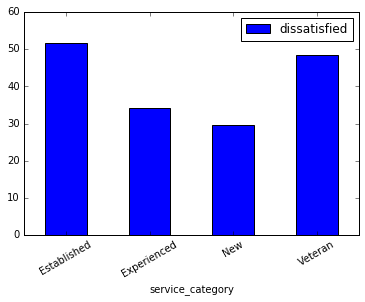

In [183]:
#using the pivot_table() method to calculate percentage of dissatisfied employees in each of our designated categories
dis_pct = combined_updated.pivot_table(index='service_category', values='dissatisfied')*100
print(dis_pct)
#make bar plot
%matplotlib inline
dis_pct.plot(kind='bar', rot=30)

The graph above shows that the veteran and established categories have the highest number of dissatisfied employees who have resigned. This makes sense, taken into context with our previous findings. Employees classified 'New' are leaving in bigger numbers, possibly due to other opportunites, etc. In contrast, 'Established' and 'Veteran' employees are only leaving if they are dissatisfied. 
